# Курс «Введение в нейронные сети»

## Урок 3. TensorFlow

### Домашняя работа к уроку 3

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [3]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Задание 1

Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

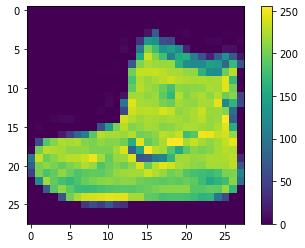

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

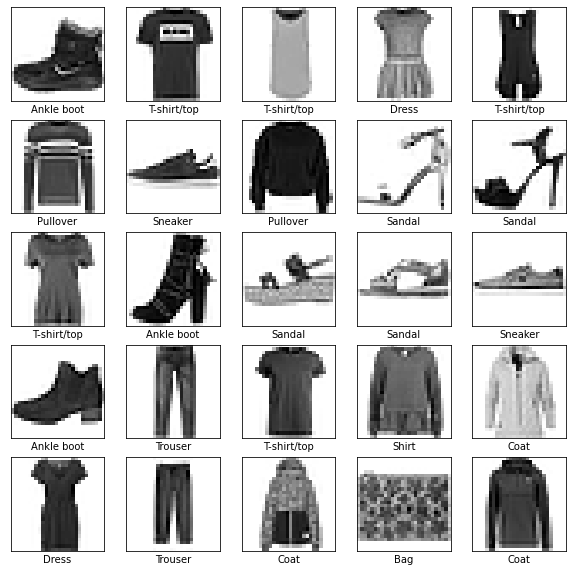

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4966 - accuracy: 0.8239
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8640
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3389 - accuracy: 0.8765


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3641 - accuracy: 0.8710

Test accuracy: 0.8709999918937683


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
predictions[0]

array([9.08235870e-06, 4.68321666e-08, 3.11589793e-06, 6.19385276e-07,
       2.41570751e-06, 1.75777506e-02, 3.32622631e-06, 7.25705698e-02,
       1.02070975e-04, 9.09731030e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

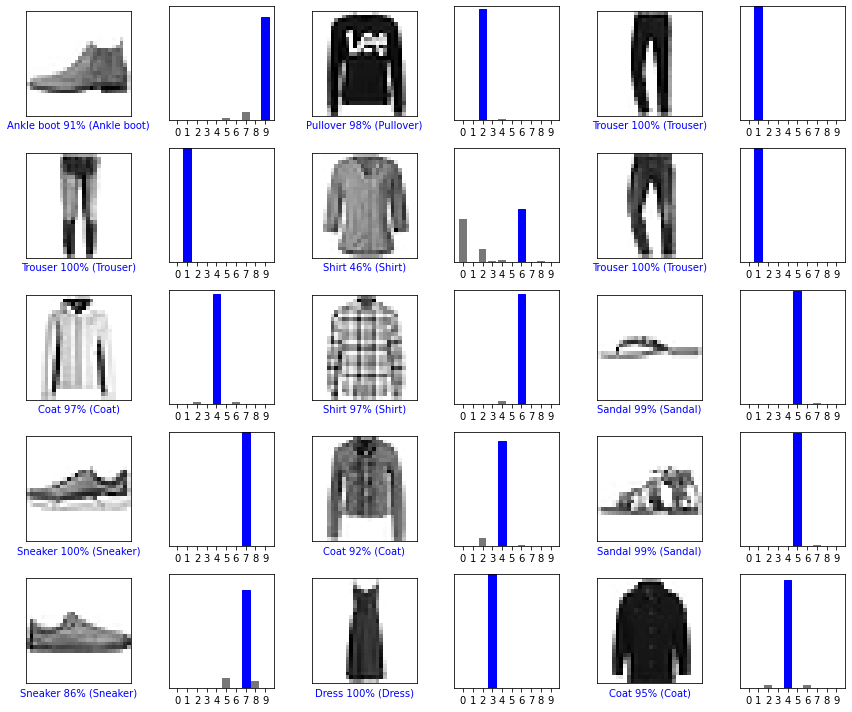

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Сначала посмотрим количество слоев и количество нейронов в слое, выберем наиболее подходящий вариант. Отедльно посмотрим количество эпох.

In [46]:
acc_list = []
# Попробуем добавить от 1 до 1 слоя и сравним получаемую точность.
for layer_count in range(1, 21):
    # Создали первый входной слой.
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # Посчитали шаг для количества нейронов в слое.
    neuron_count_step = int((128 - layer_count) / layer_count)
    # Добавили промежуточные слои.
    for i in range(layer_count):
        layers.append(keras.layers.Dense(128 - i * neuron_count_step, activation='relu'))
    layers.append(keras.layers.Dense(10, activation='softmax'))
    model = keras.Sequential(layers)
    # Скомпилировали модель.
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Вывели данные по слою
    print('\n\n')
    print('Слоев', layer_count)
    model.summary()
    # Обучили.
    model.fit(train_images, train_labels, epochs=30, verbose=0)
    # Получили метрики.
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    acc_list.append(test_acc)
# Вывели все занчения точности
print(f'Лучшая модель по точности ({max(acc_list)}) с количеством слоев: {acc_list.index(max(acc_list))}')




Слоев 1
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_107 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_625 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_626 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.3994 - accuracy: 0.8858



Слоев 2
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_108 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_627 (Dense)    

313/313 - 0s - loss: 0.3768 - accuracy: 0.8944



Слоев 8
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_114 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_660 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_661 (Dense)            (None, 113)               14577     
_________________________________________________________________
dense_662 (Dense)            (None, 98)                11172     
_________________________________________________________________
dense_663 (Dense)            (None, 83)                8217      
_________________________________________________________________
dense_664 (Dense)            (None, 68)                5712      
_____________________________________________________________

313/313 - 0s - loss: 0.3764 - accuracy: 0.8920



Слоев 13
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_119 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_715 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_716 (Dense)            (None, 120)               15480     
_________________________________________________________________
dense_717 (Dense)            (None, 112)               13552     
_________________________________________________________________
dense_718 (Dense)            (None, 104)               11752     
_________________________________________________________________
dense_719 (Dense)            (None, 96)                10080     
____________________________________________________________

313/313 - 0s - loss: 0.3450 - accuracy: 0.8851



Слоев 17
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_123 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_777 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_778 (Dense)            (None, 122)               15738     
_________________________________________________________________
dense_779 (Dense)            (None, 116)               14268     
_________________________________________________________________
dense_780 (Dense)            (None, 110)               12870     
_________________________________________________________________
dense_781 (Dense)            (None, 104)               11544     
____________________________________________________________

313/313 - 0s - loss: 0.4692 - accuracy: 0.8325



Слоев 20
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_126 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_834 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_835 (Dense)            (None, 123)               15867     
_________________________________________________________________
dense_836 (Dense)            (None, 118)               14632     
_________________________________________________________________
dense_837 (Dense)            (None, 113)               13447     
_________________________________________________________________
dense_838 (Dense)            (None, 108)               12312     
____________________________________________________________

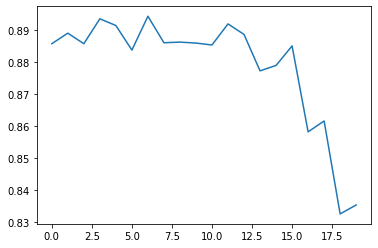

In [53]:
plt.plot(acc_list)
plt.show()

Точность сначала растет с ростом количества слоев, но потом резко падает после добавления 11 слоев, что связано с переобучением модели. Качество модели также зависит от начального задания весовых коэффициентов.

Создадим модель с 6-ю слоями и посмотрим сколько эпох необходимо для обучения модели.

In [54]:
acc_list = []
for epoch_count in range(1, 101):
    print('Количество эпох:', epoch_count)
    layers = [keras.layers.Flatten(input_shape=(28, 28))]

    # Добавили промежуточные слои.
    for i in range(6):
        layers.append(keras.layers.Dense(128 - i * 20, activation='relu'))

    layers.append(keras.layers.Dense(10, activation='softmax'))

    model = keras.Sequential(layers)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=epoch_count, verbose=0)

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    
    print('Точность на проверочных данных:', test_acc, '\n')
    acc_list.append(test_acc)

Количество эпох: 1
313/313 - 0s - loss: 0.4603 - accuracy: 0.8283
Точность на проверочных данных: 0.8282999992370605 

Количество эпох: 2
313/313 - 0s - loss: 0.3873 - accuracy: 0.8614
Точность на проверочных данных: 0.8614000082015991 

Количество эпох: 3
313/313 - 0s - loss: 0.3833 - accuracy: 0.8561
Точность на проверочных данных: 0.8561000227928162 

Количество эпох: 4
313/313 - 0s - loss: 0.3551 - accuracy: 0.8738
Точность на проверочных данных: 0.8737999796867371 

Количество эпох: 5
313/313 - 0s - loss: 0.3550 - accuracy: 0.8691
Точность на проверочных данных: 0.8690999746322632 

Количество эпох: 6
313/313 - 0s - loss: 0.3577 - accuracy: 0.8723
Точность на проверочных данных: 0.8723000288009644 

Количество эпох: 7
313/313 - 0s - loss: 0.3381 - accuracy: 0.8802
Точность на проверочных данных: 0.8802000284194946 

Количество эпох: 8
313/313 - 0s - loss: 0.3511 - accuracy: 0.8802
Точность на проверочных данных: 0.8802000284194946 

Количество эпох: 9
313/313 - 0s - loss: 0.3379 -

313/313 - 0s - loss: 0.5181 - accuracy: 0.8902
Точность на проверочных данных: 0.8902000188827515 

Количество эпох: 65
313/313 - 0s - loss: 0.5867 - accuracy: 0.8854
Точность на проверочных данных: 0.8853999972343445 

Количество эпох: 66
313/313 - 0s - loss: 0.4990 - accuracy: 0.8861
Точность на проверочных данных: 0.8860999941825867 

Количество эпох: 67
313/313 - 0s - loss: 0.4730 - accuracy: 0.8886
Точность на проверочных данных: 0.8885999917984009 

Количество эпох: 68
313/313 - 0s - loss: 0.5863 - accuracy: 0.8954
Точность на проверочных данных: 0.8953999876976013 

Количество эпох: 69
313/313 - 0s - loss: 0.5508 - accuracy: 0.8927
Точность на проверочных данных: 0.8927000164985657 

Количество эпох: 70
313/313 - 0s - loss: 0.5998 - accuracy: 0.8952
Точность на проверочных данных: 0.8952000141143799 

Количество эпох: 71
313/313 - 0s - loss: 0.5350 - accuracy: 0.8942
Точность на проверочных данных: 0.8942000269889832 

Количество эпох: 72
313/313 - 0s - loss: 0.5426 - accuracy: 

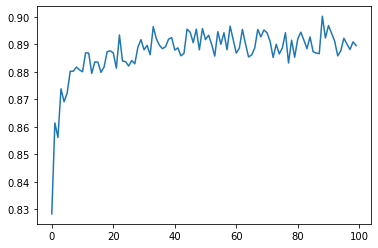

In [55]:
plt.plot(acc_list)
plt.show()

In [56]:
print(f'Лучшее количество эпох по точности ({max(acc_list)}): {acc_list.index(max(acc_list))}')

Лучшее количество эпох по точности (0.9002000093460083): 88


Как видно, где-то после 50 эпох точность перестает существенно меняться и колеблется около среднего, что обсуловлено случайным заданием начальных значений весовых коэффициентов.

#### Задание 2

Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.

| Метод                 | Описание                                                            |
| --------------------- | :------------------------------------------------------------------- |
| get_layer             | Извлекает слой по имени или индексу.                                |
| load_weights          | Загружает веса всех слоев из файла весов TensorFlow или HDF5.       |
| make_predict_function | Создает функцию, которая выполняет один шаг вывода.                 |
| make_test_function    | Создает функцию, которая выполняет один шаг оценки.                 |
| make_train_function   | Создает функцию, которая выполняет один шаг обучения.               |
| predict_on_batch      | Возвращает прогнозы для одной партии образцов.                      |
| predict_step          | Выполнение одного шага вывода.                                      |
| reset_metrics         | Сбрасывает состояние всех показателей в модели.                     |
| save                  | Сохраняет модель в Tensorflow SavedModel или в отдельный файл HDF5. |
| save_weights          | Сохраняет все веса слоев.                                           |
| summary               | Выводит в консоль сводку модели.                                    |
| test_on_batch         | Тестирование модели на одной партии образцов.                       |
| test_step             | Выполнение одного шага оценки.                                      |
| to_json               | Возвращает строку JSON, содержащую конфигурацию модели.             |
| to_yaml               | Возвращает строку yaml, содержащую конфигурацию модели.             |
| train_on_batch        | Выполняет одно обновление градиента для одного пакета данных.       |
| train_step            | Выполнение одного шага обучения.                                    |